In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [3]:
# Sequential model with 8 neuron in input layer 16 neuron in hidden layer
model= Sequential()
model.add(Dense(16, input_shape=(8, )))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


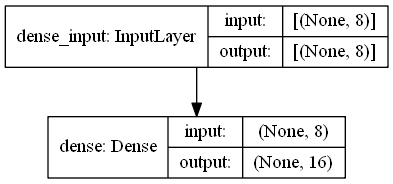

In [6]:
plot_model(model, 
           to_file='model_plot.png', # save output in png format
           show_shapes=True, 
           show_layer_names=True)

In [8]:
# show all parameter of Dense (hidden) layer
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 16,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [10]:
# show weight of layers and biases
model.get_weights()

[array([[-0.35634696,  0.054106  , -0.11693895, -0.41184926,  0.3808117 ,
         -0.23071957,  0.02519059,  0.30159795,  0.31402624, -0.16821289,
         -0.21797013,  0.3076421 , -0.48963094, -0.35600424, -0.08245122,
          0.2448703 ],
        [ 0.36443758, -0.04006374, -0.16388452, -0.30418444,  0.43827105,
          0.48975003,  0.36815846,  0.32850492, -0.4284761 ,  0.48687327,
         -0.02553821, -0.11904371,  0.25432587, -0.07827139, -0.24339914,
         -0.20248735],
        [ 0.14782679,  0.4754336 , -0.0678705 , -0.4538256 , -0.2857015 ,
         -0.32134616, -0.03775406,  0.28969955, -0.07966065,  0.20456243,
         -0.14075696, -0.19725883,  0.26323032, -0.00578833,  0.05774093,
          0.2210598 ],
        [ 0.43426228, -0.14000535, -0.24339747, -0.4597379 , -0.32443416,
         -0.34985435, -0.28560913, -0.42757714,  0.02199733,  0.0835315 ,
         -0.37314487,  0.39256775, -0.28183126, -0.15465951,  0.14291573,
          0.13648343],
        [-0.10784507

### Use of Dropout

In [13]:
# Droupout is used to prevent model from overfitting
from tensorflow.keras.layers import Dropout

model= Sequential()
# 8 neuron in input and 16 neuron in hidden layer
model.add(Dense(16, input_shape=(8, )))
# reduce 20% input during training model
model.add(Dropout(0.2))
# output layer with 10 neuron
model.add(Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 314
Trainable params: 314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Use of Flatten

In [27]:
# Flatten is used to flatten input data
# used with multilayer is presemt and want to pass through dense layer

from tensorflow.keras.layers import Dense, Flatten
model= Sequential()

# 2 neuron in input layer for 8 layers
model.add(Dense(16, name='hidden_layer', input_shape=(8, 2)))

# bring multi dimensional array to 1D array
model.add(Flatten( name='Flatten_layer'))
model.add(Dense(10, name='Output_layer'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 8, 16)             48        
_________________________________________________________________
Flatten_layer (Flatten)      (None, 128)               0         
_________________________________________________________________
Output_layer (Dense)         (None, 10)                1290      
Total params: 1,338
Trainable params: 1,338
Non-trainable params: 0
_________________________________________________________________


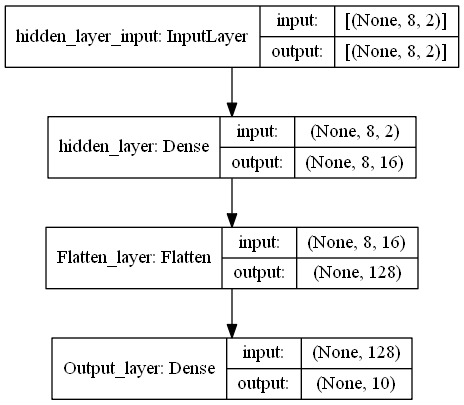

In [28]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Use of Permute

In [29]:
# Permute is used to change input shape

from tensorflow.keras.layers import Dense, Permute
model=Sequential()
model.add(Dense(16, input_shape=(8,2), name='hidden_layer'))
# permute 2nd & 1st dimension of input
model.add(Permute((2,1), name='permute_layer'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 8, 16)             48        
_________________________________________________________________
permute_layer (Permute)      (None, 16, 8)             0         
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


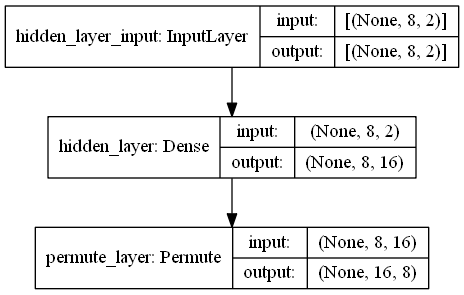

In [30]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Use of Conv2D & MaxPooling2D

In [38]:
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

model= Sequential()
# no of filter=32,   kernel size= 5X5,   strides= height & width of convolution
model.add(Conv2D(32, name='Conv2D_layer', kernel_size=(5,5), strides=(1,1), input_shape=(28,28,1)))
# output= (28-5+1*0)/1 +1 =24

model.add(MaxPooling2D(pool_size=(2,2),name='Maxpool2D_layer', strides=(2,2)))
model.add(Flatten(name='flatten_layer'))

model.add(Dense(1000, name='output_layer', activation='relu'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_layer (Conv2D)        (None, 24, 24, 32)        832       
_________________________________________________________________
Maxpool2D_layer (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 4608)              0         
_________________________________________________________________
output_layer (Dense)         (None, 1000)              4609000   
Total params: 4,609,832
Trainable params: 4,609,832
Non-trainable params: 0
_________________________________________________________________


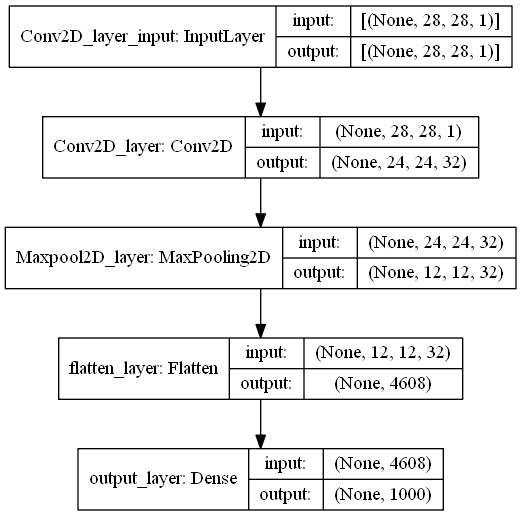

In [40]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Initializers

In [41]:
import numpy as np
from keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

In [51]:
# name of initializers
initializers= ['zeros', 'ones', Constant(value=5), 'RandomNormal', 'RandomUniform', 'TruncatedNormal', 'VarianceScaling',
               'Orthogonal', 'lecun_normal', 'lecun_uniform', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

In [52]:
# generating model for different initializers
np.random.seed(1)

for init in initializers:
    print('initializers= ', init)
    model= Sequential([Dense(5, input_dim=2, kernel_initializer=init)])
    
    for layer in model.layers:
        weights=layer.get_weights()
        print(weights)
    print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

initializers=  zeros
[array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
initializers=  ones
[array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
initializers=  <keras.initializers.initializers_v2.Constant object at 0x00000083BD183608>
[array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
initializers=  RandomNormal
[array([[-0.05008746, -0.02507379, -0.01846656, -0.08701815, -0.02067344],
       [ 0.01631761, -0.04399832, -0.09709468, -0.0438872 ,  0.03824551]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
i

## Regularizers

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import constraints
from tensorflow.keras import regularizers

In [54]:
# L1 regularizer
my_reg= regularizers.l1(0.1)

model= Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=my_reg))
model.get_config()

{'name': 'sequential_59',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_53_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_53',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L1',
     'config': {'l1': 0.10000000149011612}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [55]:
# L2 regularizer

my_reg= regularizers.l2(0.1)

model= Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=my_reg))
model.get_config()

{'name': 'sequential_60',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_54_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_54',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.10000000149011612}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [57]:
# L1L2

my_reg= regularizers.l1_l2(l1=0.01, l2=0.01)

model= Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=my_reg))
model.get_config()

{'name': 'sequential_61',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_55_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_55',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L1L2',
     'config': {'l1': 0.009999999776482582, 'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

## Activation

In [58]:
# activation function is special function used to find whether specific neuron is activated or not
# it enable neuron to learn better

from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential

In [59]:
model=Sequential()

In [60]:
# Linear activation function
model.add(Dense(512, activation='linear', input_shape=(784, )))
model.get_config()

{'name': 'sequential_62',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_56_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_56',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [61]:
# relu activation function
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.get_config()

{'name': 'sequential_62',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_56_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_56',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_57',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUnif

## Constrant

In [62]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import constraints

In [63]:
model=Sequential()

In [64]:
# MaxNorm
my_constraint= constraints.MaxNorm(max_value=2, axis=0)
model.add(Dense(512, activation='relu', input_shape=(784, ), kernel_constraint= my_constraint))
model.get_config()

{'name': 'sequential_63',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_58_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_58',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': {'class_name': 'MaxNorm',
     'config': {'max_value': 2, 'axis': 0}},
    'bias_constraint': None}}]}

In [66]:
# UnitNorm
my_constraint= constraints.UnitNorm(axis=0)
model.add(Dense(512, activation='relu', input_shape=(784, ), kernel_constraint= my_constraint))
model.get_config()

{'name': 'sequential_63',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_58_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_58',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': {'class_name': 'MaxNorm',
     'config': {'max_value': 2, 'axis': 0}},
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_59',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bi

In [68]:
# MinMaxNorm
my_constraint= constraints.MinMaxNorm(min_value=0.0, max_value=2.0, rate=1.0, axis=0)
model.add(Dense(512, activation='relu', input_shape=(784, ), kernel_constraint= my_constraint))
model.get_config()

{'name': 'sequential_63',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_58_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_58',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': {'class_name': 'MaxNorm',
     'config': {'max_value': 2, 'axis': 0}},
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_59',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bi

In [69]:
# NonNeg
my_constraint= constraints.NonNeg()
model.add(Dense(512, activation='relu', input_shape=(784, ), kernel_constraint= my_constraint))
model.get_config()

{'name': 'sequential_63',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_58_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_58',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': {'class_name': 'MaxNorm',
     'config': {'max_value': 2, 'axis': 0}},
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_59',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bi